In [135]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

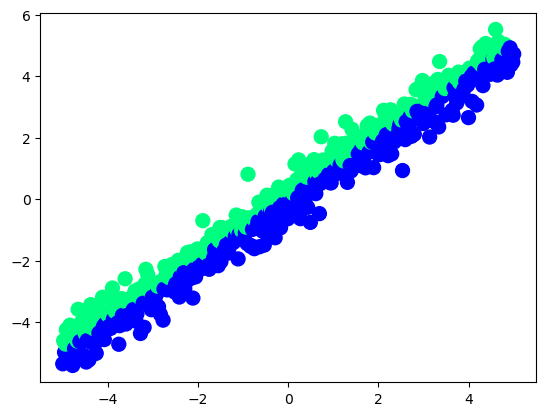

In [29]:
np.random.seed(13)
n=500
X=np.zeros(shape=(n,2))
X[:,0]=np.linspace(-5,5,500)
X[:,1]=X[:,0]+0.5 *np.random.normal(size=n)
y=(X[:,1]>X[:,0]).astype(int)
plt.scatter(X[:,0],X[:,1],s=100,c=y,cmap="winter")
plt.show()

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=13)
lr=LogisticRegression(random_state=13)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr,y_test):.2f}")

Linear model accuracy: 0.99


In [37]:
#! pip install mlxtend


In [39]:
from mlxtend.plotting import plot_decision_regions

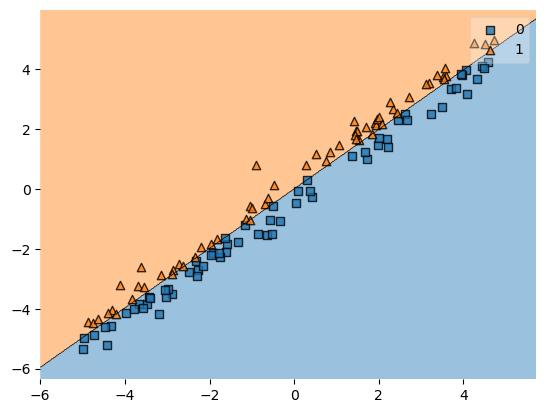

In [43]:
plot_decision_regions(X_test,y_test,lr)
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [47]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train,y_train)
y_pred_dt= dt.predict(X_test)
print(f"Decision tree model accuracy: {accuracy_score(y_pred_dt,y_test):.2f}")

Decision tree model accuracy: 0.86


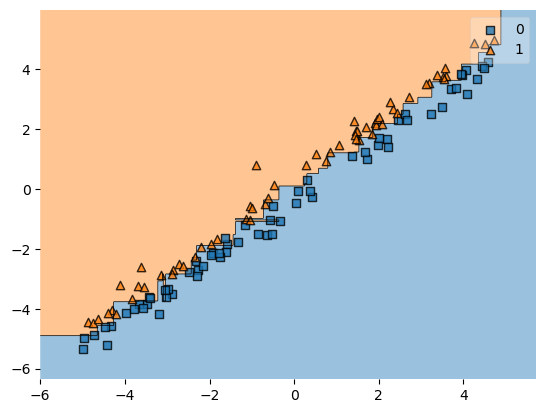

In [49]:
plot_decision_regions(X_test,y_test,dt)
plt.show()

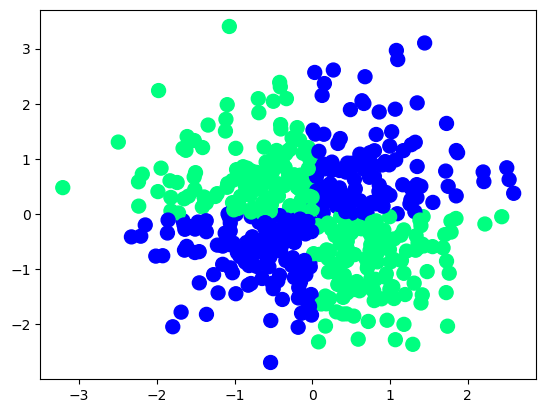

In [51]:
np.random.seed(13)
X = np.random.randn(500,2)
y = np.logical_xor(X[:,0]>0,X[:,1] >0).astype(int)
plt.scatter(X[:,0],X[:,1],s=100,c=y,cmap="winter")
plt.show()

Linear model accuracy: 0.39


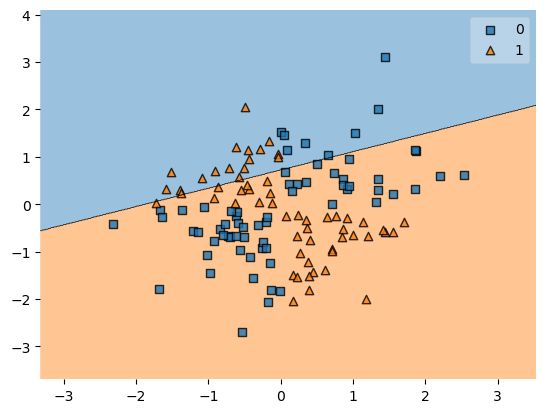

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=13)
lr=LogisticRegression(random_state=13)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr,y_test):.2f}")
plot_decision_regions(X_test,y_test,lr)
plt.show()

Decision tree model accuracy: 0.97


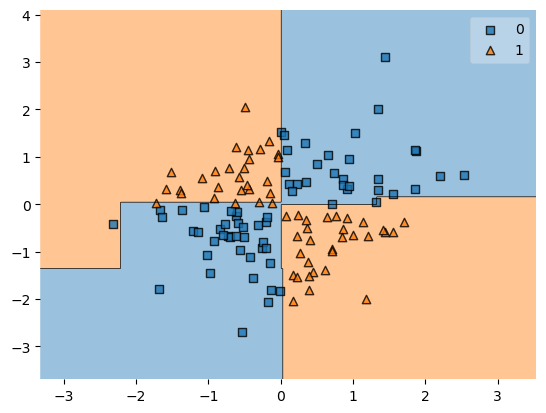

In [55]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train,y_train)
y_pred_dt= dt.predict(X_test)
print(f"Decision tree model accuracy: {accuracy_score(y_pred_dt,y_test):.2f}")
plot_decision_regions(X_test,y_test,dt)
plt.show()

In [59]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3,3,size=n_samples)
    y_no_noise = (np.cos(4*x)+x)
    y= (y_no_noise + rnd.normal(size=len(x)))/2
    return x.reshape(-1,1),y,y_no_noise

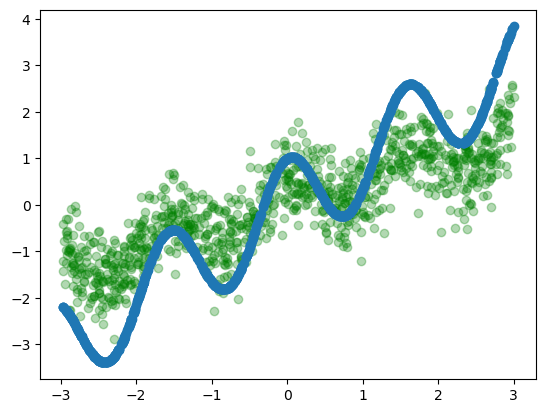

In [65]:
X,y,y_no_noise=make_wave(n_samples=1000)
plt.scatter(X,y,c="g",alpha=0.3)
plt.scatter(X,y_no_noise)
plt.show()

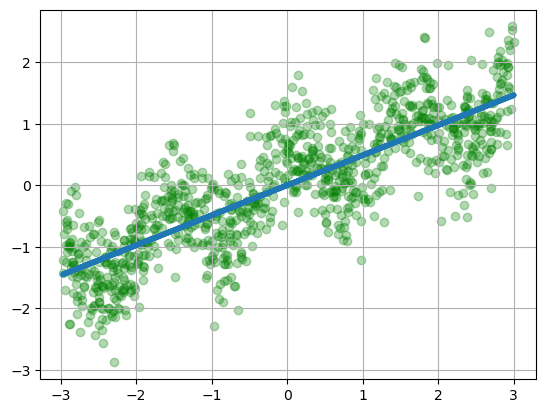

In [147]:
lr= LinearRegression()
lr.fit(X,y)
plt.plot(X,lr.predict(X),linewidth=4)
plt.scatter(X,y,c="g",alpha=0.3)
plt.grid()
plt.show()


In [111]:
bins= np.linspace(-3,3,11)
X_cat = np.digitize(X,bins=bins)
encoder = OneHotEncoder()
encoder.fit(X_cat)
X_binned = encoder.transform(X_cat)
lr2= LinearRegression().fit(X_binned,y)

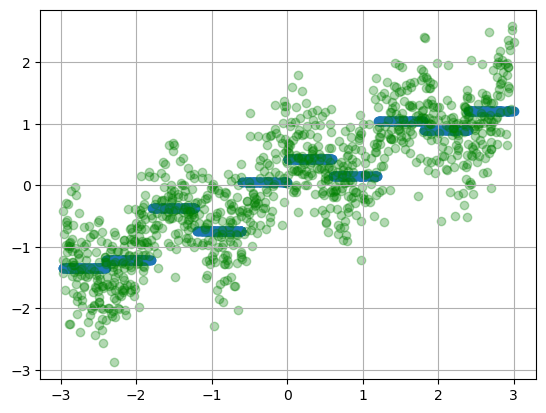

In [145]:

plt.scatter(X,lr2.predict(X_binned))
plt.scatter(X,y,c='g',alpha=0.3)
plt.grid()
plt.show()

In [121]:
new_data = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
new_data_binned = encoder.transform(np.digitize(new_data,bins=bins))

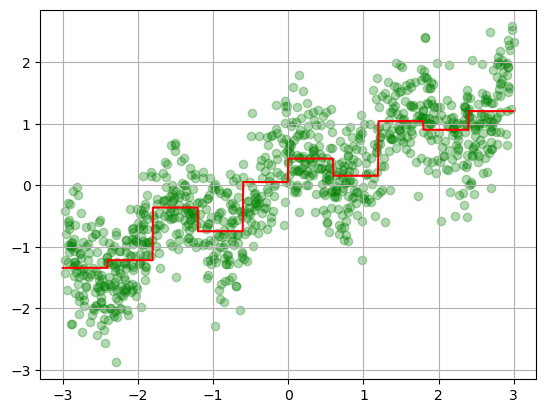

In [129]:
plt.plot(new_data,lr2.predict(new_data_binned),c="r")
plt.scatter(X,y,c='g',alpha=0.3)
plt.grid()
plt.show()

In [131]:
dt = DecisionTreeRegressor(max_depth=3,random_state=13)
dt.fit(X,y)
y_pred_dt= dt.predict(new_data)

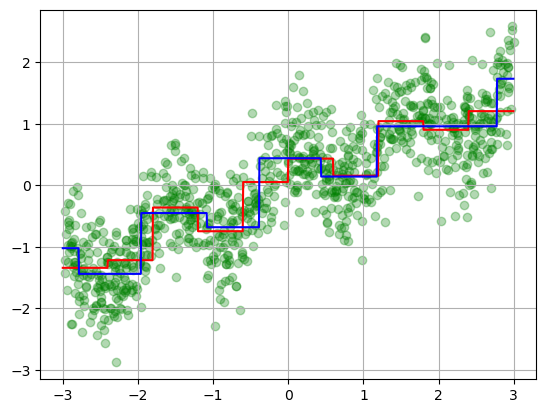

In [151]:

plt.plot(new_data,lr2.predict(new_data_binned),c="r")
plt.plot(new_data,dt.predict(new_data),c="b")
plt.scatter(X,y,c='g',alpha=0.3)
plt.grid()
plt.show()

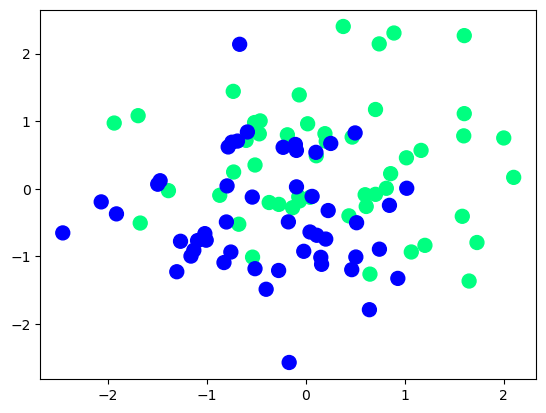

In [155]:
np.random.seed(13)
n=100
X=np.random.normal(size=(n,2))
X[:50,:] +=0.25
X[50:,:] -=0.25
y=np.array([1]*50+[0]*50)
plt.scatter(X[:,0],X[:,1],s=100,c=y,cmap="winter")
plt.show()

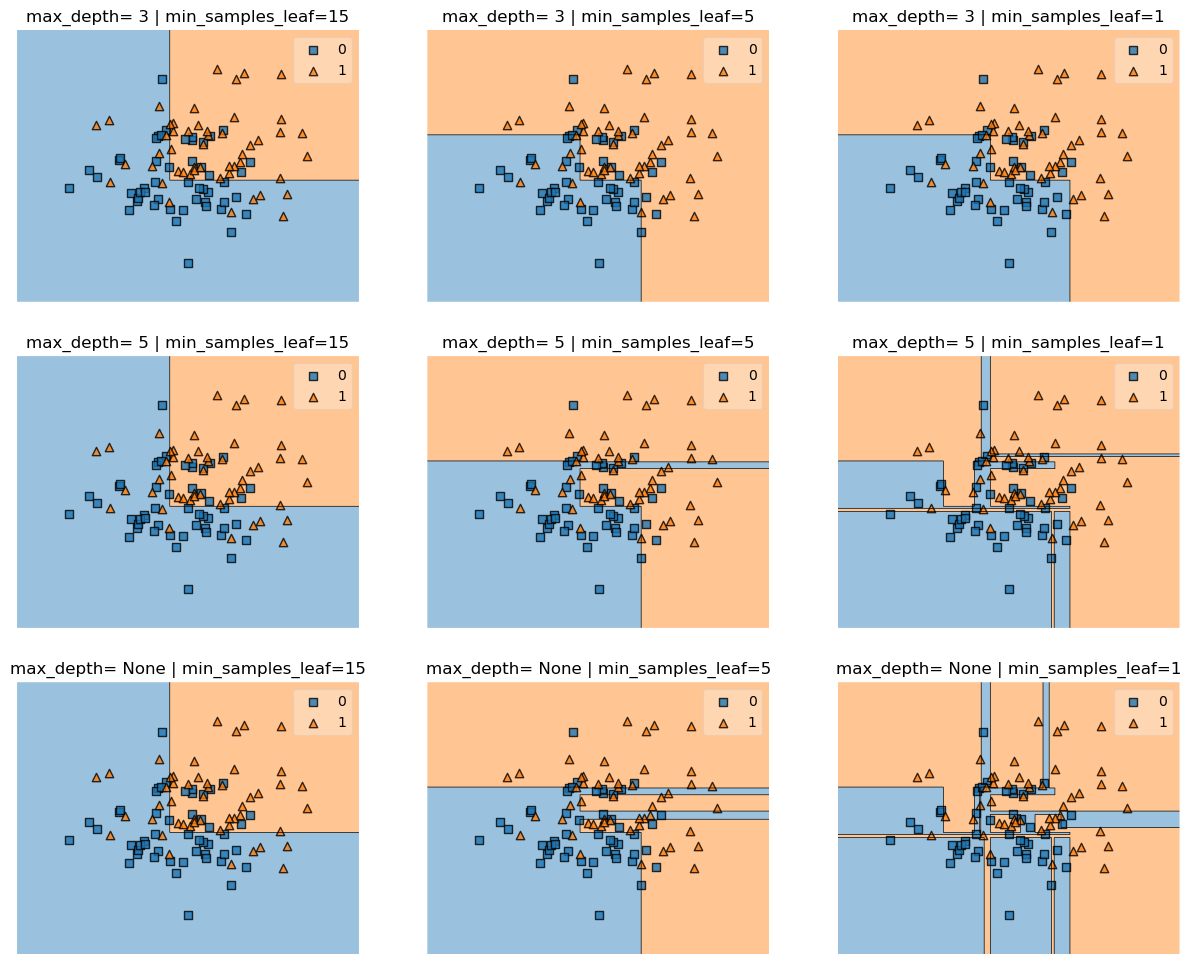

In [163]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i ,max_depth in enumerate([3,5,None]):
    for j,min_samples_leaf in enumerate([15,5,1]):
        dt = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=13)
        dt.fit(X,y)
        ax[i][j].set_title(f"max_depth= {max_depth} | min_samples_leaf={min_samples_leaf}")
        ax[i][j].axis("off")
        plot_decision_regions(X,y,dt,ax=ax[i][j])
plt.show()

## Неустойчивость

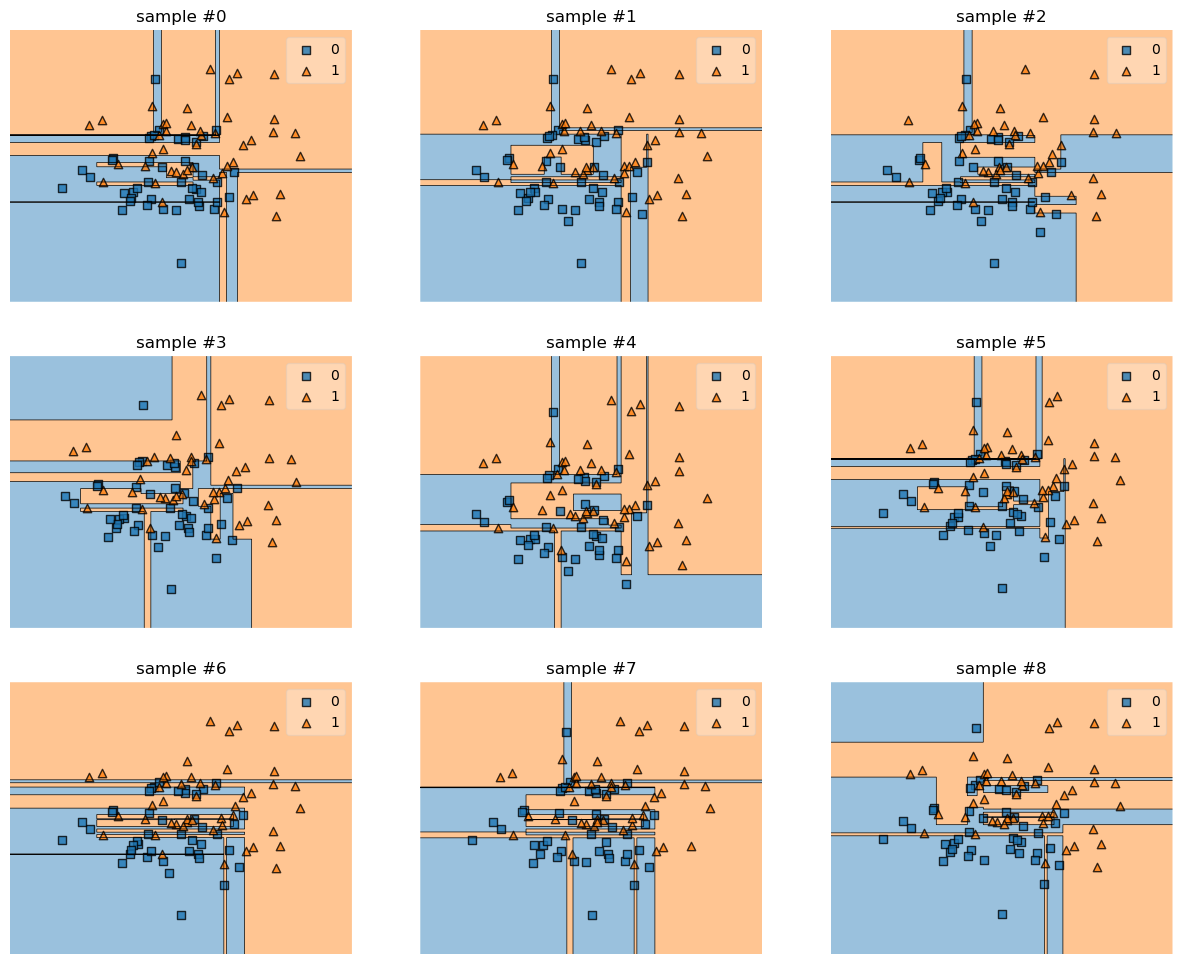

In [170]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i in range(3):
    for j in range(3):
        seed_idx=3 *i +j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice (len(X),replace=False,size=int(0.9*len(X)))
        X_part,y_part =X[idx_part,:],y[idx_part]
        dt.fit(X_part,y_part)
        ax[i][j].set_title(f"sample #{seed_idx}")
        ax[i][j].axis("off")
        plot_decision_regions(X_part,y_part,dt,ax=ax[i][j])
plt.show()

In [174]:
import pandas as pd  
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [188]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [204]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [190]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [192]:
X = pd.DataFrame(data=housing['data'],columns=housing['feature_names'])
y= housing['target']
print(f"Data shape:{X.shape}")
X.head()

Data shape:(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


(array([  36.,  841., 1628., 1984., 1878., 2221., 2153., 1618., 1591.,
        1208., 1075.,  694.,  567.,  672.,  435.,  317.,  244.,  235.,
         144., 1099.]),
 array([0.14999 , 0.392491, 0.634992, 0.877493, 1.119994, 1.362495,
        1.604996, 1.847497, 2.089998, 2.332499, 2.575   , 2.817501,
        3.060002, 3.302503, 3.545004, 3.787505, 4.030006, 4.272507,
        4.515008, 4.757509, 5.00001 ]),
 <BarContainer object of 20 artists>)

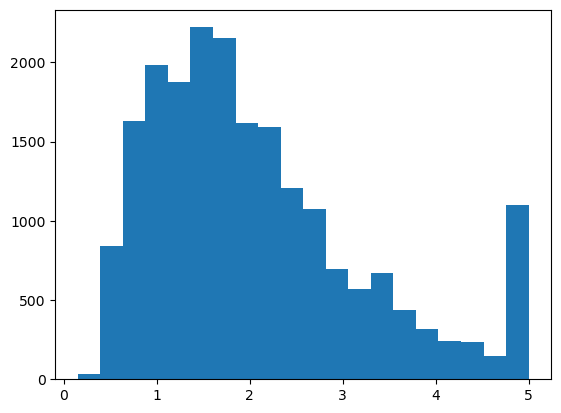

In [206]:
plt.hist(y,bins=20)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=13)


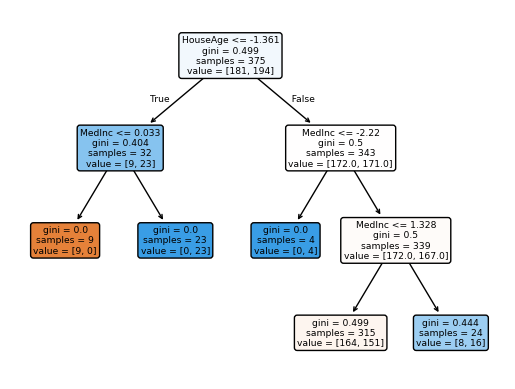

In [236]:
dt =DecisionTreeClassifier(max_depth=3,random_state=13)
dt.fit(X_train,y_train)
tree.plot_tree(dt,feature_names=X.columns,filled=True,rounded=True)
plt.show()

In [238]:
mean_squared_error(y_test,dt.predict(X_test))

0.456

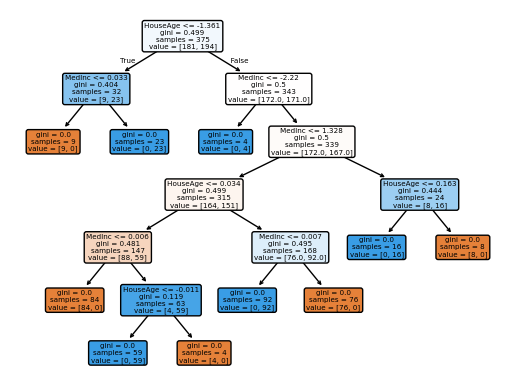

In [248]:
dt =DecisionTreeClassifier(max_depth=6,random_state=13)
dt.fit(X_train,y_train)
tree.plot_tree(dt,feature_names=X.columns,filled=True,rounded=True)
plt.show()

In [250]:
mean_squared_error(y_test,dt.predict(X_test))

0.032

In [252]:
dt.feature_importances_

array([0.8699688, 0.1300312])

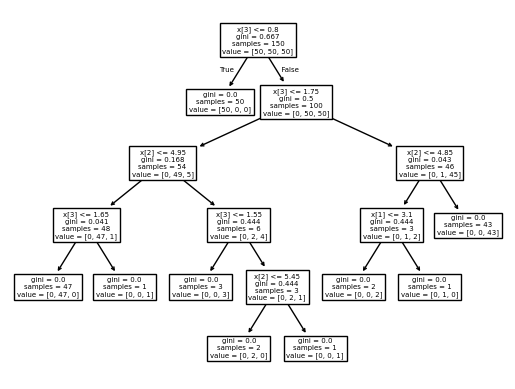

In [216]:
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
fig=tree.plot_tree(clf)

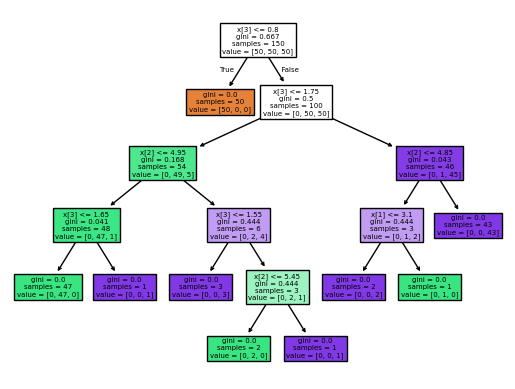

In [232]:
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
fig=tree.plot_tree(clf,filled=True)

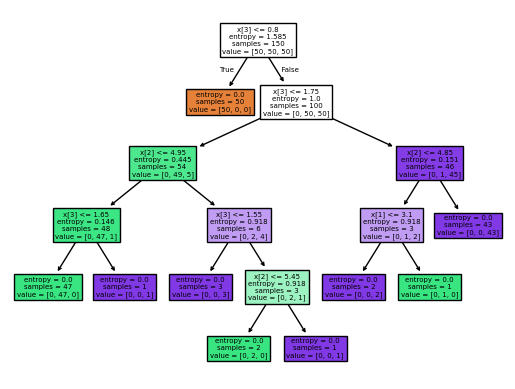

In [220]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
fig=tree.plot_tree(clf,filled=True)

## Решающиее дерево своими руками

In [259]:
### code 